In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Aula 1 - Análise abstracts

In [2]:
arqs = os.listdir('../dados')

In [3]:
for i,arq in enumerate(arqs):
    
    if i == 0:
        df = pd.read_excel(f'../dados/{arq}')
        df = df.loc[df['Language'] == 'English']
    else:
        aux = pd.read_excel(f'../dados/{arq}')
        aux = aux.loc[aux['Language'] == 'English']
        df = pd.concat([df,aux])

In [4]:
dic_key={}

for keywords in df['Keywords Plus']:
    if not isinstance(keywords,float):
        
        keywords = keywords.split(' ')
        
        for keyword in keywords:
            if ';' in keyword:
                keyword = keyword.replace(';','')
            
            keyword = keyword.lower()
            
            if keyword not in dic_key:
                dic_key[keyword] = 1
            else:
                dic_key[keyword] += 1

dic_key = dict(sorted(dic_key.items(), key=lambda item: item[1]))

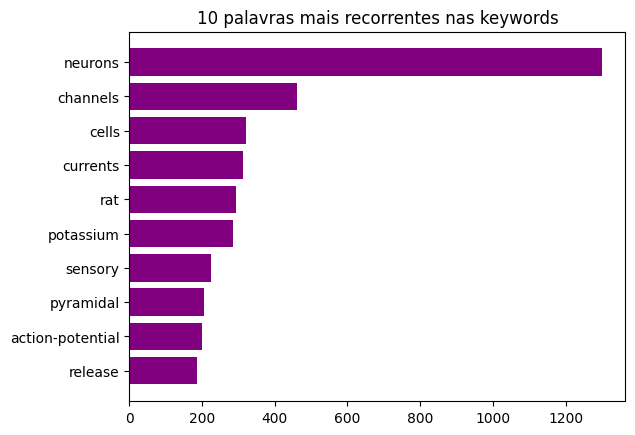

In [5]:
qtd = 10
plt.barh(list(dic_key.keys())[-qtd:],list(dic_key.values())[-qtd:],color='purple')
plt.title(f'{qtd} palavras mais recorrentes nas keywords')
plt.show()

#### Aula 2

#####  Extração dos valores em ms

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [26]:
limite = 20
count = 0
lista_vals,abs_vals = [],[]

for abs_index,abstract in enumerate(df['Abstract']):
        
    if not isinstance(abstract,float):
        if ' ms ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='ms':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])
        
        if ' millisecond ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='millisecond':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='millisecond':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])

In [8]:
inf,sup = [],[]

for val in lista_vals:
    if 'and' not in val and 'to' not in val:
        
        if '+' in val and '/-' in val:
            if val[0] != '+':
                # print(val[0],'+/-',val[-1])
                
                if ',' in val[0]:
                    val[0] = val[0].replace(',','.')
                
                if ',' in val[-1]:
                    val[-1] = val[-1].replace(',','.')
                    
                inf.append(round(float(val[0])-float(val[-1]),4))
                sup.append(round(float(val[0])+float(val[-1]),4))
                
                # print(f'inf {float(val[0])-float(val[-1])}')
                # print(f'sup {float(val[0])+float(val[-1])}')
            # print()
            
        # elif '-' in val:
            # print(val)

In [9]:
print('Contagem de ocorrências',count)

Contagem de ocorrências 348


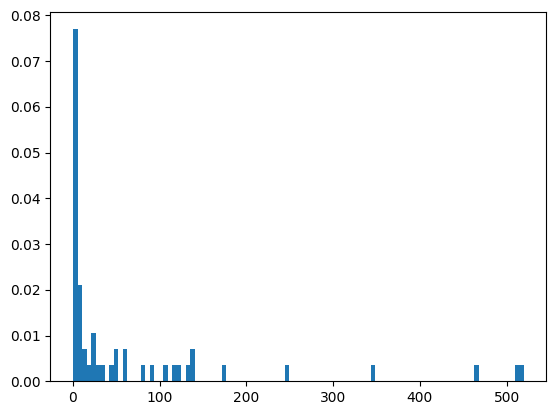

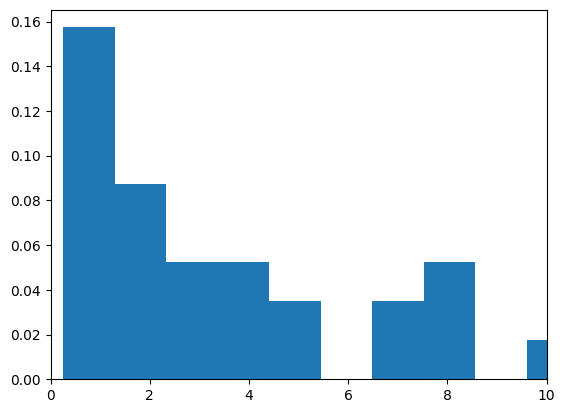

In [10]:
plt.hist(inf,bins=100,density=True)
plt.show()
plt.hist(inf,bins=500,density=True)
plt.xlim(0,10)
plt.show()

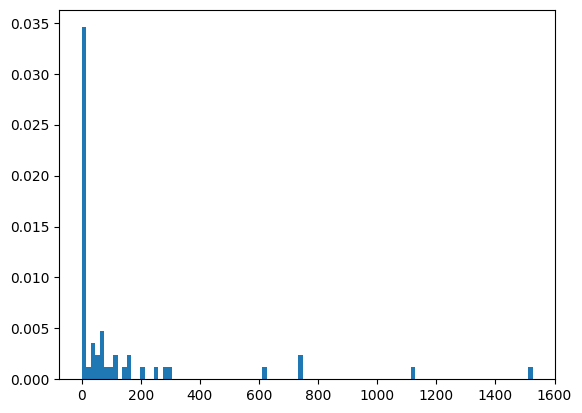

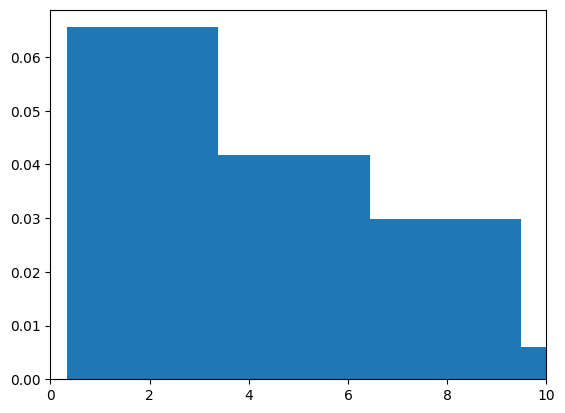

In [11]:
plt.hist(sup,bins=100,density=True)
plt.show()
plt.hist(sup,bins=500,density=True)
plt.xlim(0,10)
plt.show()

##### NER

In [12]:
for ms_index in ms_indexes:
    doc_aux = doc[ms_index-9:ms_index+7]
    doc_aux = nlp(str(doc_aux))

In [13]:
doc = nlp(doc_aux)

In [14]:
doc

Fast spikes spontaneously fired last 2.8 +/- 0.6 ms (mean +/- S.D.)

In [15]:
[(t.text, t.ent_type_) for t in doc]

[('Fast', ''),
 ('spikes', ''),
 ('spontaneously', ''),
 ('fired', ''),
 ('last', 'DATE'),
 ('2.8', 'DATE'),
 ('+', 'DATE'),
 ('/-', ''),
 ('0.6', 'CARDINAL'),
 ('ms', ''),
 ('(', ''),
 ('mean', ''),
 ('+', ''),
 ('/-', ''),
 ('S.D.', ''),
 (')', '')]

In [16]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [17]:
displacy.render(doc, style='dep', jupyter=True)

In [18]:
[(t.text, t.dep_) for t in doc]

[('Fast', 'amod'),
 ('spikes', 'nsubj'),
 ('spontaneously', 'advmod'),
 ('fired', 'ROOT'),
 ('last', 'amod'),
 ('2.8', 'nummod'),
 ('+', 'punct'),
 ('/-', 'punct'),
 ('0.6', 'nummod'),
 ('ms', 'dobj'),
 ('(', 'punct'),
 ('mean', 'nmod'),
 ('+', 'nmod'),
 ('/-', 'punct'),
 ('S.D.', 'appos'),
 (')', 'punct')]

In [19]:
[(t.text, t.dep_, t.head.text) for t in doc]

[('Fast', 'amod', 'spikes'),
 ('spikes', 'nsubj', 'fired'),
 ('spontaneously', 'advmod', 'fired'),
 ('fired', 'ROOT', 'fired'),
 ('last', 'amod', '2.8'),
 ('2.8', 'nummod', 'ms'),
 ('+', 'punct', '2.8'),
 ('/-', 'punct', '2.8'),
 ('0.6', 'nummod', 'ms'),
 ('ms', 'dobj', 'fired'),
 ('(', 'punct', 'ms'),
 ('mean', 'nmod', 'S.D.'),
 ('+', 'nmod', 'S.D.'),
 ('/-', 'punct', 'S.D.'),
 ('S.D.', 'appos', 'ms'),
 (')', 'punct', 'ms')]

### Aula 3

In [30]:
list(df['Abstract'])[1006]

'In cortical pyramidal neurons, backpropagating action potentials (bAPs) supply Ca2+ to synaptic contacts on dendrites. To determine whether the efficacy of AP backpropagation into apical tuft dendrites is stable over time, we performed dendritic Ca2+ and voltage imaging in rat brain slices. We found that the amplitude of bAP-Ca2+ in apical tuft branches was unstable, given that it varied from trial to trial (termed bAP-Ca2+ flickering). Small perturbations in dendritic physiology, such as spontaneous synaptic inputs, channel inactivation, or temperature-induced changes in channel kinetics, can cause bAP flickering. In the tuft branches, the density of Na+ and K+ channels was sufficient to support local initiation of fast spikelets by glutamate iontophoresis. We quantified the time delay between the somatic AP burst and the peak of dendritic Ca2+ transient in the apical tuft, because this delay is important for induction of spike-timing dependent plasticity. Depending on the frequency 